In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

import librosa as lb
import librosa.display as lbd
import os

In [2]:
patient_data=pd.read_csv("C:/Users/Tijo Thomas/Downloads/DM/Respiratory_Sound_Database/patient_diagnosis.csv",names=['pid','disease'])

In [3]:
patient_data.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [4]:
df=pd.read_csv("C:/Users/Tijo Thomas/Downloads/DM/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt",sep='\t',names=['start','end','crackles','wheezes'])
df.head()

,start,end,crackles,wheezes
0,0.036,0.579,0,0
1,0.579,2.450,0,0
2,2.450,3.893,0,0
3,3.893,5.793,0,0
4,5.793,7.521,0,0


In [5]:
path="C:/Users/Tijo Thomas/Downloads/DM/Respiratory_Sound_Database/audio_and_txt_files/"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:5]

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200']

In [6]:
def getFilenameInfo(file):
    return file.split('_')
getFilenameInfo('226_1b1_Ll_sc_Meditron')

['226', '1b1', 'Ll', 'sc', 'Meditron']

In [7]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','wheezes'])
    name_data=getFilenameInfo(file)
    data['pid']=name_data[0]
    #data['disease']=name_data[]
    data['acquisition_mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,wheezes,pid,acquisition_mode,filename
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron


In [9]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      126 non-null    int64 
 1   disease  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [10]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 10
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start             6898 non-null   float64
 1   end               6898 non-null   float64
 2   crackles          6898 non-null   int64  
 3   wheezes           6898 non-null   int64  
 4   pid               6898 non-null   object 
 5   acquisition_mode  6898 non-null   object 
 6   filename          6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 431.1+ KB


In [11]:
patient_data.pid=patient_data.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')
data=pd.merge(files_df,patient_data,on='pid')
data.head()

,start,end,crackles,wheezes,pid,acquisition_mode,filename,disease
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI


In [12]:
def getPureSample(raw_data,start,end,sr=22050):
   
    max_ind = len(raw_data)
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

<Axes: xlabel='None', ylabel='pid'>

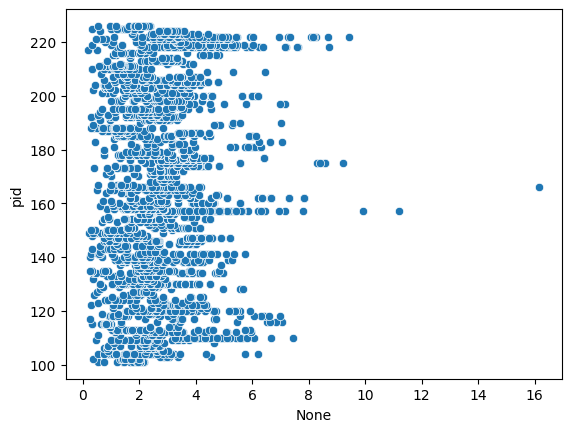

In [13]:
sns.scatterplot(x=(data.end-data.start), y=data.pid)

In [17]:
os.makedirs('processed_audio_files')

In [18]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 start                                0.036
end                                  0.579
crackles                                 0
wheezes                                  0
pid                                    101
acquisition_mode                        sc
filename            101_1b1_Al_sc_Meditron
disease                               URTI
Name: 0, dtype: object


In [20]:
import soundfile as sf
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    start=row['start']
    end=row['end']
    filename=row['filename']

    
    if end-start>maxLen:
        end=start+maxLen

    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
      if data.iloc[index-1]['filename']==filename:
        i+=1
      else:
        i=0
    filename= filename + '_' + str(i) + '.wav'

    save_path='processed_audio_files/' + filename
    c+=1
    #print(" ",c)

    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample = getPureSample(audioArr, start, end, sampleRate)
    
    reqLen = 6 * sampleRate
   
    
    padding_needed = reqLen - len(pureSample)

    
    if padding_needed > 0:
        padded_data = np.pad(pureSample, (padding_needed // 2, padding_needed // 2), 'constant')
    else:
        padded_data = pureSample
    #padded_data = lb_util.pad_center(pureSample, reqLen, padding_value=0)
    #padded_data = lb.util.pad_center(pureSample, reqLen, padding_value=0)

    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


In [21]:
diagnosis=pd.read_csv("C:/Users/Tijo Thomas/Downloads/DM/Respiratory_Sound_Database/patient_diagnosis.csv",names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


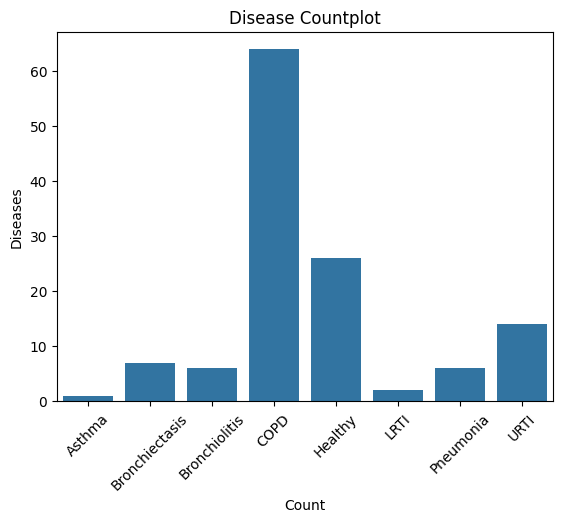

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure "diagnosis.disease" is a categorical data type
diagnosis['disease'] = diagnosis['disease'].astype('category')

# Create the countplot
sns.countplot(data=diagnosis, x='disease')
plt.xticks(rotation=45)
plt.ylabel('Diseases')
plt.xlabel('Count')
plt.title('Disease Countplot')
plt.show()

In [25]:
def extractId(filename):
    return filename.split('_')[0]

In [26]:
path='C:/Users/Tijo Thomas/Downloads/DM/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,101,101_1b1_Al_sc_Meditron_0.wav
1,101,101_1b1_Al_sc_Meditron_1.wav
2,101,101_1b1_Al_sc_Meditron_10.wav
3,101,101_1b1_Al_sc_Meditron_11.wav
4,101,101_1b1_Al_sc_Meditron_2.wav


In [27]:
files_df.pid=files_df.pid.astype('int64') # both pid-s must be of same dtype for them to merge

In [28]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

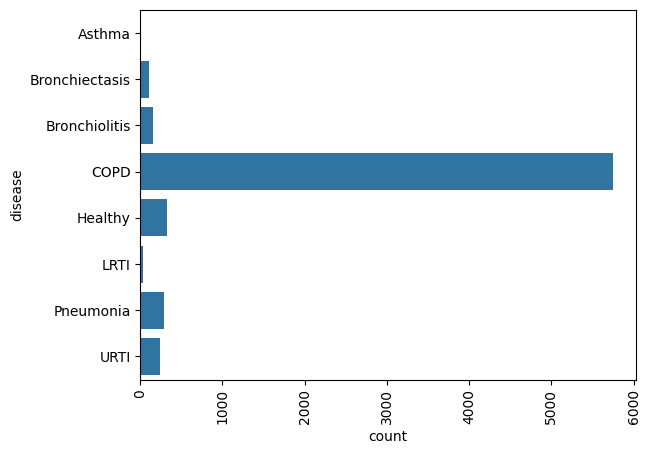

In [29]:
sns.countplot(data.disease)
plt.xticks(rotation=90)

In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [31]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: disease, dtype: float64

In [32]:
Xval.disease.value_counts()/Xval.shape[0]

COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: disease, dtype: float64

[Text(0.5, 1.0, 'MFCC')]

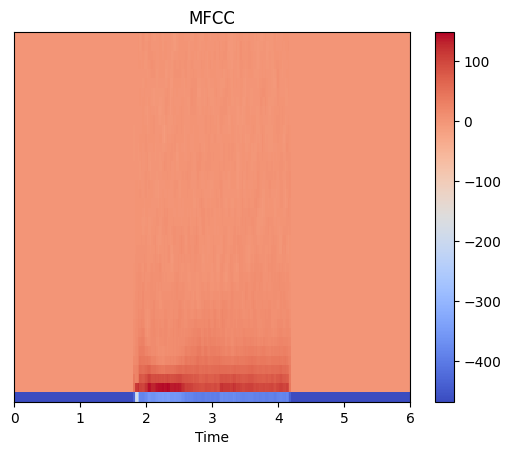

In [33]:
path='C:/Users/Tijo Thomas/Downloads/DM/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [34]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')

In [36]:
train=pd.read_csv('C:/Users/Tijo Thomas/Downloads/DM/train.csv')
val=pd.read_csv('C:/Users/Tijo Thomas/Downloads/DM/val.csv')
train.head()

,Unnamed: 0,pid,filename,disease
0,1650,133,133_2p4_Pr_mc_AKGC417L_0.wav,COPD
1,2672,152,152_1b1_Al_sc_Meditron_6.wav,Healthy
2,548,112,112_1p1_Pr_sc_Litt3200_8.wav,COPD
3,4733,179,179_1b1_Al_sc_Meditron_6.wav,Healthy
4,1438,130,130_3p2_Ar_mc_AKGC417L_6.wav,COPD


In [38]:
ytrain=train.disease
yval=val.disease
yval

0       COPD
1       COPD
2       COPD
3       COPD
4       COPD
        ... 
1720    COPD
1721    COPD
1722    COPD
1723    COPD
1724    COPD
Name: disease, Length: 1725, dtype: object

In [39]:
train.head()

,Unnamed: 0,pid,filename,disease
0,1650,133,133_2p4_Pr_mc_AKGC417L_0.wav,COPD
1,2672,152,152_1b1_Al_sc_Meditron_6.wav,Healthy
2,548,112,112_1p1_Pr_sc_Litt3200_8.wav,COPD
3,4733,179,179_1b1_Al_sc_Meditron_6.wav,Healthy
4,1438,130,130_3p2_Ar_mc_AKGC417L_6.wav,COPD


In [40]:
new_train = train[['filename', 'disease']]

In [41]:
path_init = 'C:/Users/Tijo Thomas/Downloads/DM/processed_audio_files/'
new_train.head()

,filename,disease
0,133_2p4_Pr_mc_AKGC417L_0.wav,COPD
1,152_1b1_Al_sc_Meditron_6.wav,Healthy
2,112_1p1_Pr_sc_Litt3200_8.wav,COPD
3,179_1b1_Al_sc_Meditron_6.wav,Healthy
4,130_3p2_Ar_mc_AKGC417L_6.wav,COPD


In [42]:
new_train['filename'] = path_init + new_train['filename']

C:\Users\Tijo Thomas\AppData\Local\Temp\ipykernel_5308\850116267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['filename'] = path_init + new_train['filename']


In [43]:
new_train

,filename,disease
0,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
1,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,Healthy
2,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
3,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,Healthy
4,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
...,...,...
5168,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
5169,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
5170,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD
5171,C:/Users/Tijo Thomas/Downloads/DM/processed_au...,COPD


In [44]:
import csv
header = 'filename label chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()

In [45]:
tot_rows = len(new_train.index)

In [46]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [48]:
file = open('data_1.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
        source = new_train['filename'][i]
        #file_name = '../input/coughclassifier-trial/trial_covid/'+source
        file_name = source
        label = new_train['disease'][i]
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{source} {label} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'

        file = open('data_1.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [49]:
data = pd.read_csv('./data_1.csv')

In [50]:
data.head()

,filename,label,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
C:/Users/Tijo,Thomas/Downloads/DM/processed_audio_files/133_...,COPD,0.370697,0.072289,410.397853,1004.699761,561.159261,0.004865,-410.207977,56.420528,...,2.178808,4.073886,1.738164,3.259224,0.621523,2.660979,0.581564,2.435141,0.497695,2.210375
C:/Users/Tijo,Thomas/Downloads/DM/processed_audio_files/152_...,Healthy,0.390662,0.031146,131.065479,488.973479,148.339844,0.001212,-543.286011,51.179680,...,5.232435,5.222618,4.836187,4.100944,3.406135,2.982996,2.899364,3.053441,3.057795,2.697453
C:/Users/Tijo,Thomas/Downloads/DM/processed_audio_files/112_...,COPD,0.552431,0.086096,38.692614,164.662454,48.449707,0.000995,-517.072571,67.961494,...,14.372701,14.451823,13.124480,10.898049,8.309216,5.887878,3.901463,2.344604,1.248985,0.753034
C:/Users/Tijo,Thomas/Downloads/DM/processed_audio_files/179_...,Healthy,0.433844,0.056977,345.960879,1118.987113,286.511230,0.003400,-525.344849,36.197807,...,11.064487,3.101232,7.715580,2.529866,7.630042,2.957896,6.821326,1.000375,4.405519,2.645488
C:/Users/Tijo,Thomas/Downloads/DM/processed_audio_files/130_...,COPD,0.237594,0.040692,314.316307,557.787137,794.036865,0.003506,-443.542175,24.107534,...,4.555475,4.079222,1.738921,1.990836,2.618085,1.785375,1.574931,0.957787,0.128726,0.688218


In [51]:
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,...,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000
mean,0.403661,0.089491,254.531754,663.884189,381.722772,0.003647,-470.761281,64.561305,28.195811,18.537814,...,5.756823,5.221963,3.659833,3.936366,3.139137,3.340673,2.449737,2.797295,1.831511,2.012736
std,0.151166,0.084617,211.036324,403.263516,467.465446,0.005223,107.514321,27.594908,14.878956,10.386965,...,3.402345,2.919051,2.640659,2.229436,2.050637,1.798685,1.967734,2.254495,2.125676,1.604582
min,0.047444,0.000270,31.054919,66.543218,33.994548,0.000054,-939.639343,6.650436,-40.450050,-37.648960,...,-5.003972,-1.891890,-6.493854,-6.259891,-5.440899,-2.947278,-3.021511,-3.303051,-5.746421,-6.111849
25%,0.303356,0.025661,103.858058,323.788839,142.358398,0.001230,-540.145813,44.264790,18.400209,11.393476,...,3.417341,3.313244,1.929024,2.436495,1.800801,2.082088,1.126883,1.276917,0.550747,0.943362
50%,0.388818,0.064402,184.799221,587.540459,203.668213,0.002369,-456.912903,61.088448,26.480383,17.762039,...,5.307084,4.891945,3.335517,3.697186,2.883156,3.166390,2.034300,2.400022,1.362634,1.906446
75%,0.503719,0.129191,337.511336,941.784629,383.610026,0.004286,-394.246368,81.569695,36.786926,24.568041,...,7.518123,6.744829,4.997777,5.169845,4.275396,4.466455,3.454548,3.787431,2.605609,2.878638
max,0.834927,0.803913,1821.627338,2321.957231,4217.616781,0.109237,-212.220718,193.310684,117.536072,66.260780,...,21.676640,22.766483,23.318844,20.736906,15.940234,12.068478,12.578435,16.941341,15.258764,9.986360


In [52]:
data.info

<bound method DataFrame.info of                                                         filename    label  \
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/133_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/152_...  Healthy   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/112_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/179_...  Healthy   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/130_...     COPD   
...                                                          ...      ...   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/154_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/146_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/205_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/211_...     COPD   
C:/Users/Tijo  Thomas/Downloads/DM/processed_audio_files/138_...     COPD   

               chroma_stft      rmse  spect

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5173 entries, C:/Users/Tijo to C:/Users/Tijo
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            5173 non-null   object 
 1   label               5173 non-null   object 
 2   chroma_stft         5173 non-null   float64
 3   rmse                5173 non-null   float64
 4   spectral_centroid   5173 non-null   float64
 5   spectral_bandwidth  5173 non-null   float64
 6   rolloff             5173 non-null   float64
 7   zero_crossing_rate  5173 non-null   float64
 8   mfcc1               5173 non-null   float64
 9   mfcc2               5173 non-null   float64
 10  mfcc3               5173 non-null   float64
 11  mfcc4               5173 non-null   float64
 12  mfcc5               5173 non-null   float64
 13  mfcc6               5173 non-null   float64
 14  mfcc7               5173 non-null   float64
 15  mfcc8               5173 non-null   flo

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [55]:
def getFeatures(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [56]:
root='C:/Users/Tijo Thomas/Downloads/DM/processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in val.iterrows():
    path = root + row['filename']
    k,l,m=getFeatures(path)
    mfcc.append(k)
    cstft.append(l)
    mSpec.append(m)


mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

In [57]:
root='C:/Users/Tijo Thomas/Downloads/DM/processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in train.iterrows():
    path=root + row['filename']
    k,l,m=getFeatures(path)
    mfcc.append(k)
    cstft.append(l)
    mSpec.append(m)

mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

In [58]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [59]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [60]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfccInput (InputLayer)      [(None, 20, 259, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 20, 87, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 20, 87, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 20, 87, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 43, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 22, 64)        18

In [61]:
croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [62]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cromaInput (InputLayer)     [(None, 12, 259, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 87, 32)        832       
                                                                 
 batch_normalization_4 (Bat  (None, 12, 87, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 12, 87, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 43, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 22, 64)         1

In [63]:
mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [64]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mSpecInput (InputLayer)     [(None, 128, 259, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 87, 32)        832       
                                                                 
 batch_normalization_7 (Bat  (None, 64, 87, 32)        128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 64, 87, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 22, 64)        1

In [65]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [66]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 mfcc (InputLayer)           [(None, 20, 259, 1)]         0         []                            
                                                                                                  
 croma (InputLayer)          [(None, 12, 259, 1)]         0         []                            
                                                                                                  
 mspec (InputLayer)          [(None, 128, 259, 1)]        0         []                            
                                                                                                  
 mfccModel (Functional)      (None, 128)                  94560     ['mfcc[0][0]']                
                                                                                                

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

In [68]:
keras.utils.plot_model(net, "net.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [69]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [70]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=0,
    callbacks=my_callbacks
)

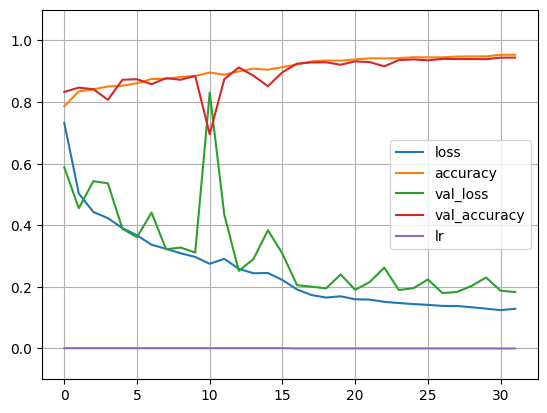

In [71]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [72]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 1s 21ms/step - loss: 0.1831 - accuracy: 0.9443


[0.18309539556503296, 0.9443477988243103]